In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy.misc import imshow

import sys
sys.path.insert(0, '../../LEARNING/tensorflow')
sys.path.insert(0, '../../LEARNING/PCA_dl')
from layers import full_connected
from Dataset import DatasetNoLabel

In [2]:
data = pd.read_csv('./inputs/train.csv').values[:, 1:].reshape(-1, 28, 28, 1)

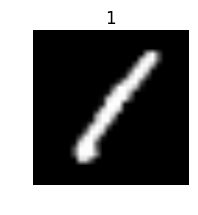

In [3]:
def showimg(imgdata, title=None, figsize=(2, 2), shape=(28, 28)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(imgdata.reshape(shape))
    plt.gray()
    plt.axis('off')
    if title != None:
        plt.title(title)

# test
showimg(data[0], 1)

In [17]:
x = tf.placeholder(tf.float32, shape=(None, 28*28))

el1, _ = full_connected(x  , 300, 'el1', 'sigmoid')
el2, _ = full_connected(el1, 100, 'el2', 'sigmoid')
el3, _ = full_connected(el2,  75, 'el3', 'sigmoid')
el4, _ = full_connected(el3,  50, 'el4', 'sigmoid')
ED, _  = full_connected(el4,  20, 'ed' , 'sigmoid')


# VAE 關鍵的操作
mu, _      = full_connected(ED, 20, 'mu')
sigma, _   = full_connected(ED, 20, 'sigma')
epsilon    = np.random.randn(20)

# 擾動
c = tf.exp(sigma) * epsilon + mu

dl1, _ = full_connected(c ,   50, 'dl1', 'sigmoid')
dl2, _ = full_connected(dl1,  75, 'dl2', 'sigmoid')
dl3, _ = full_connected(dl2, 100, 'dl3', 'sigmoid')
dl4, _ = full_connected(dl3, 300, 'dl4', 'sigmoid')
DD, _  = full_connected(dl4, 784, 'dd')

In [28]:
loss = tf.reduce_mean(tf.pow(DD - x, 2))
latent_loss = 0.5 * tf.reduce_sum(tf.square(mu) + tf.square(sigma) - tf.log(tf.square(sigma)))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss + latent_loss)
init = tf.global_variables_initializer()

dataset = DatasetNoLabel(data)


sess = tf.Session()
sess.run(init)

step:100 loss: 3518419.25
step:200 loss: 2254296.0
step:300 loss: 1565839.0
step:400 loss: 1168121.75
step:500 loss: inf
step:600 loss: 870392.0
step:700 loss: 856389.375
step:800 loss: 794654.9375
step:900 loss: 782485.875
step:1000 loss: 928379.3125
step:1100 loss: 855762.25
step:1200 loss: 761615.0
step:1300 loss: 748549.375
step:1400 loss: 719831.9375
step:1500 loss: 698192.75
step:1600 loss: 674602.5
step:1700 loss: 643096.0625
step:1800 loss: 621041.0
step:1900 loss: 600901.0625
step:2000 loss: 598144.125
step:2100 loss: 581749.125
step:2200 loss: 657516.6875
step:2300 loss: 563709.1875
step:2400 loss: 541810.1875
step:2500 loss: 526434.5625
step:2600 loss: 515204.0
step:2700 loss: 507291.5
step:2800 loss: 498037.375
step:2900 loss: 492897.28125
step:3000 loss: 487812.78125
step:3100 loss: 483973.71875
step:3200 loss: 479186.96875
step:3300 loss: 475676.75
step:3400 loss: 472023.875
step:3500 loss: 469630.75
step:3600 loss: 467228.03125
step:3700 loss: 465448.34375
step:3800 loss

KeyboardInterrupt: 

In [57]:
for _ in xrange(20000):
    batch = dataset.next_batch(128)
    feed_dict = {x: batch.reshape(-1, 28*28)}
    sess.run(optimizer, feed_dict=feed_dict)
    if (_+1)%100 == 0:
        print("step:{} loss: {}".format(_+1, sess.run(loss+latent_loss, feed_dict={x: data.reshape(-1, 28*28)})))

step:100 loss: 425156.0
step:200 loss: 425088.34375
step:300 loss: 425019.46875
step:400 loss: 425023.5625
step:500 loss: 425007.375
step:600 loss: 425120.6875
step:700 loss: 425152.375
step:800 loss: 424980.5
step:900 loss: 425043.1875
step:1000 loss: 425002.15625
step:1100 loss: 424928.71875
step:1200 loss: 424891.125
step:1300 loss: 424934.625
step:1400 loss: 424899.34375
step:1500 loss: 424978.40625
step:1600 loss: 424941.75
step:1700 loss: 424904.21875
step:1800 loss: 424998.25
step:1900 loss: 424988.90625
step:2000 loss: 424999.375
step:2100 loss: 424970.0625
step:2200 loss: 424867.09375
step:2300 loss: 424872.4375
step:2400 loss: 424908.84375
step:2500 loss: 424853.8125
step:2600 loss: 424797.90625
step:2700 loss: 424848.90625
step:2800 loss: 424772.78125
step:2900 loss: 424828.59375
step:3000 loss: 424784.625
step:3100 loss: 424894.125
step:3200 loss: 424854.90625
step:3300 loss: 424834.09375
step:3400 loss: 424852.90625
step:3500 loss: 424839.3125
step:3600 loss: 424782.34375


In [61]:
decoded_img = sess.run(DD, feed_dict={x: data.reshape(-1, 28*28)})
restructed = decoded_img.reshape(-1, 28, 28)

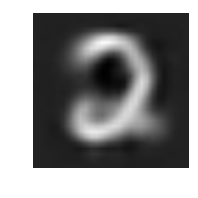

In [62]:
k = np.random.randint(data.shape[0])
showimg(restructed[k])

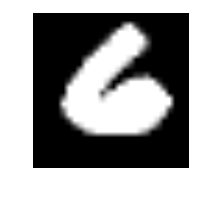

In [86]:
showimg(data[500])

In [63]:
z = sess.run(c, feed_dict={x: data.reshape(-1, 28*28)})

In [87]:
grid = [ i*z[500] + (1-i)*z[20] for i in np.linspace(0, 1, 100) ]

feed = {c: np.array(grid)}
img = sess.run(DD, feed_dict=feed)

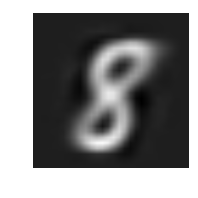

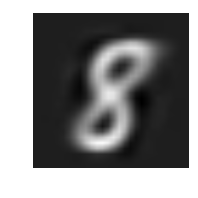

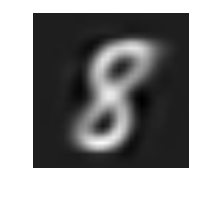

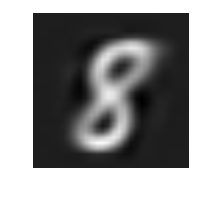

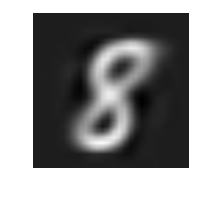

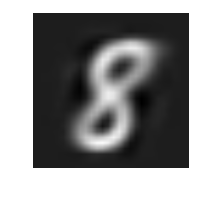

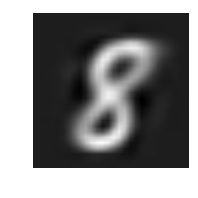

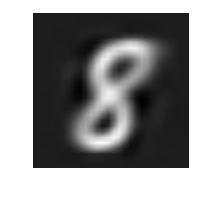

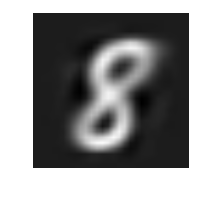

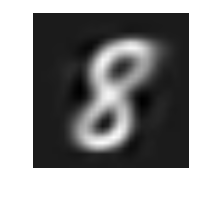

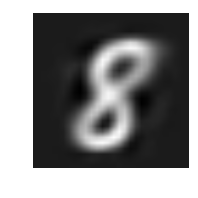

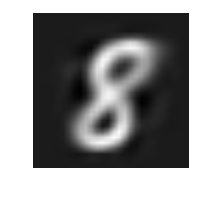

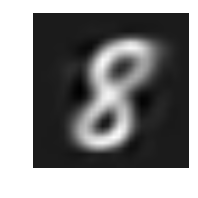

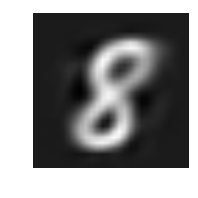

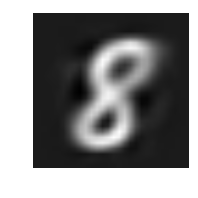

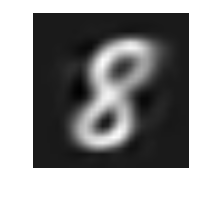

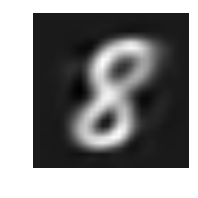

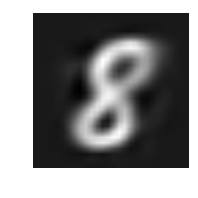

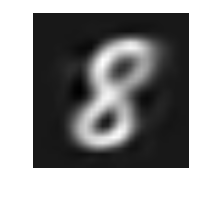

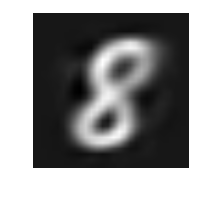

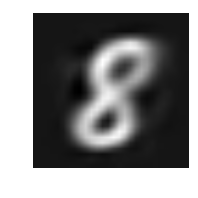

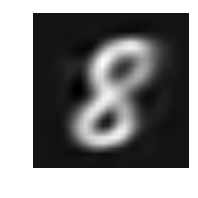

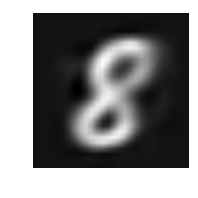

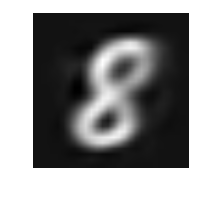

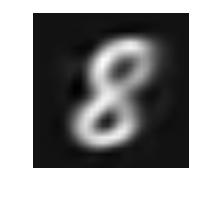

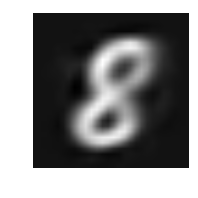

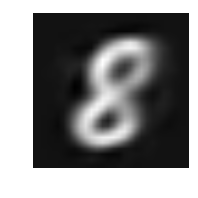

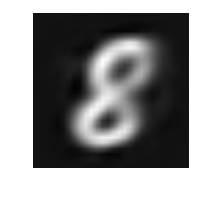

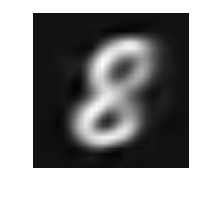

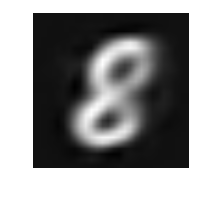

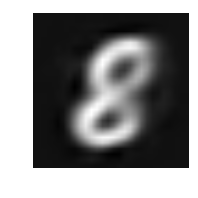

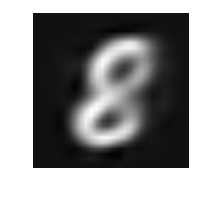

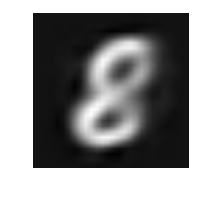

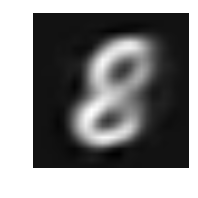

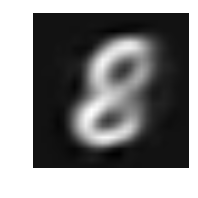

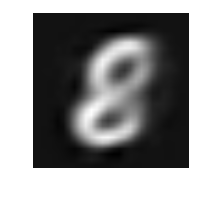

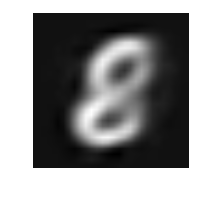

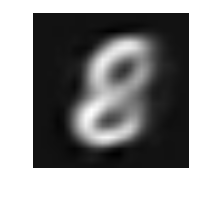

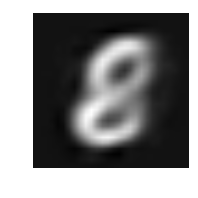

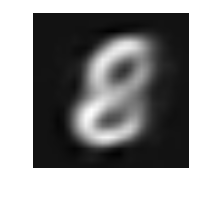

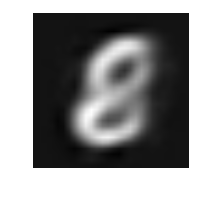

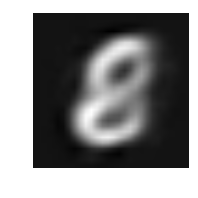

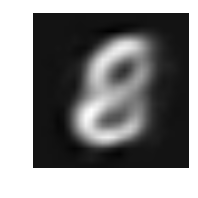

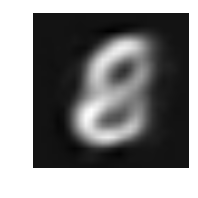

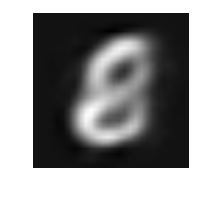

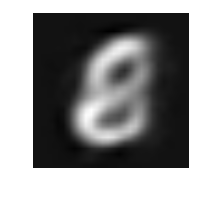

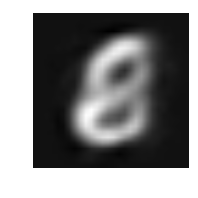

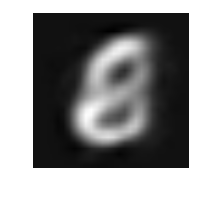

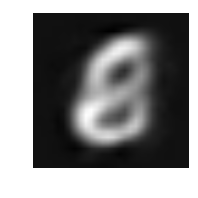

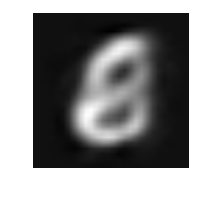

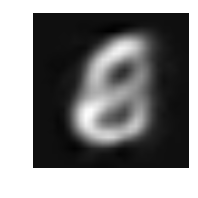

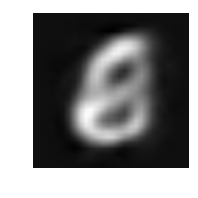

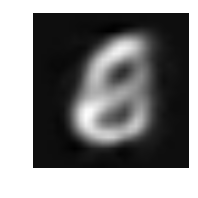

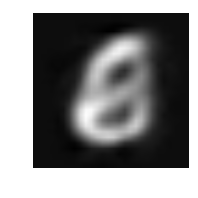

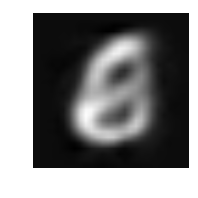

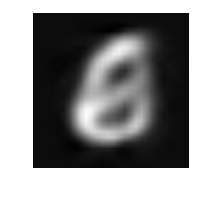

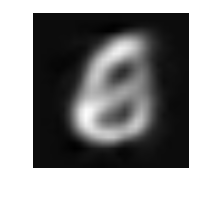

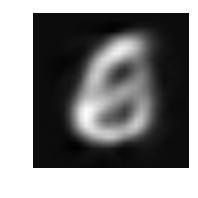

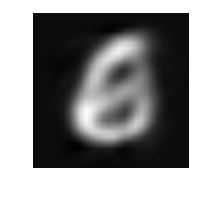

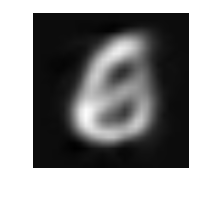

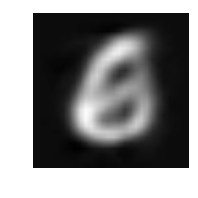

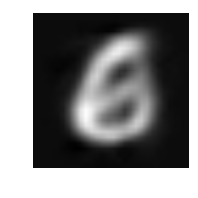

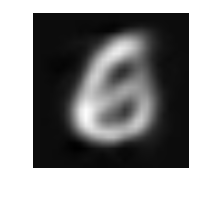

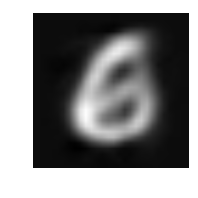

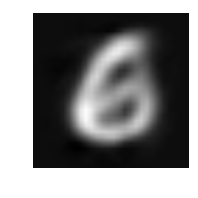

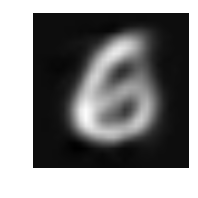

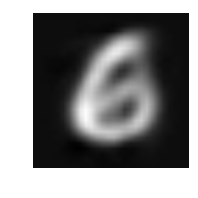

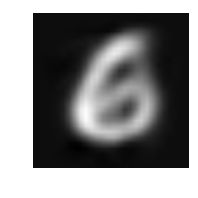

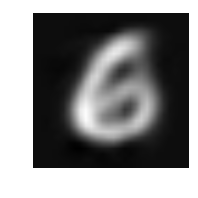

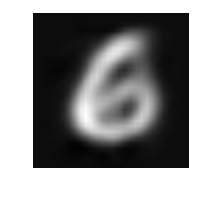

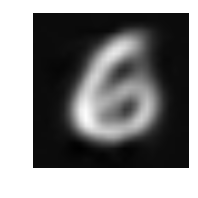

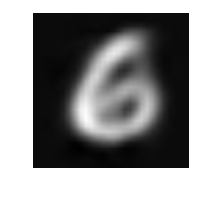

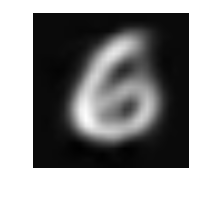

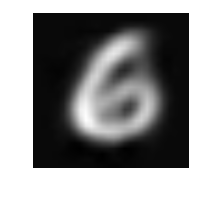

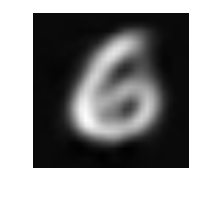

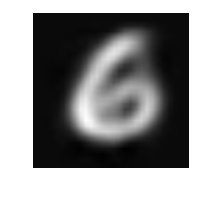

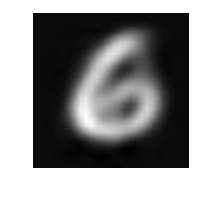

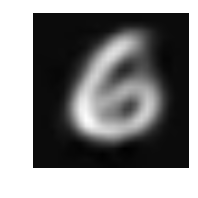

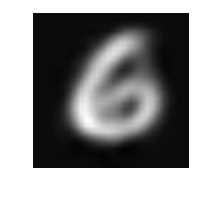

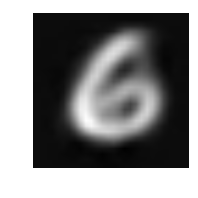

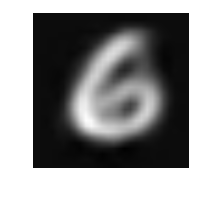

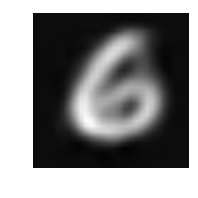

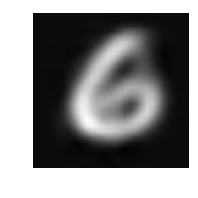

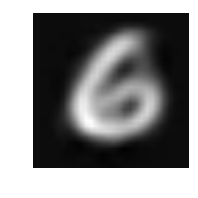

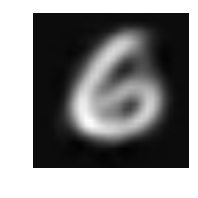

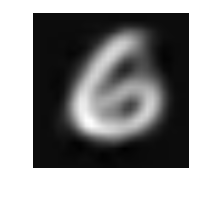

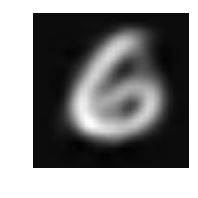

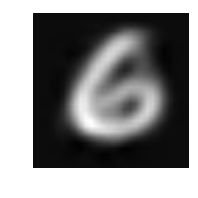

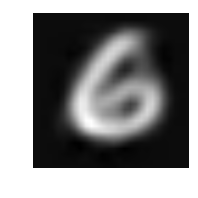

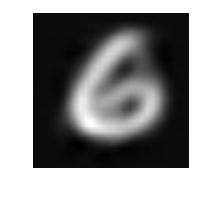

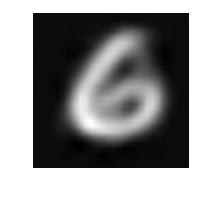

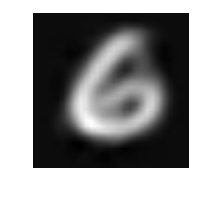

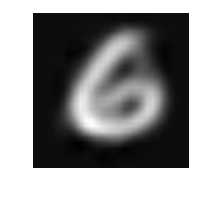

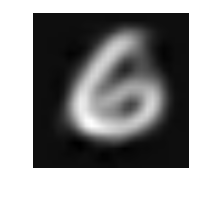

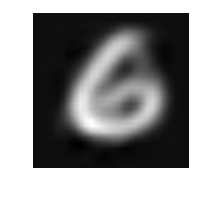

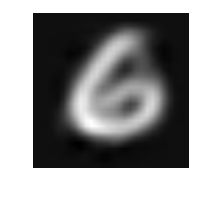

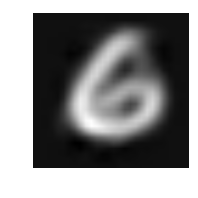

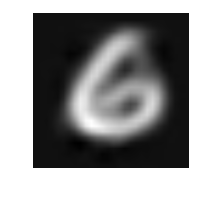

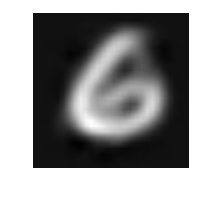

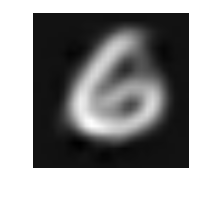

In [88]:
for i in img:
    showimg(i.reshape(-1, 28, 28))

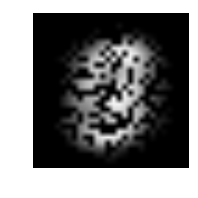

In [63]:
e = e.reshape(-1, 28, 28)
showimg(e[1])

In [64]:
ae.sess_close()

In [24]:
sess.run(mu, feed_dict=feed_dict)

array([[ 2.49552965, -4.94686651,  4.3356967 , ..., -3.90106225,
         4.71833324, -2.23787546],
       [ 2.6022892 , -4.86192417,  4.21381998, ..., -3.95127273,
         4.66330719, -2.30191183],
       [ 2.46220446, -4.98298454,  4.36133385, ..., -3.88537574,
         4.73789024, -2.237607  ],
       ..., 
       [ 2.57068777, -4.8903594 ,  4.26014137, ..., -3.9195497 ,
         4.69483519, -2.27749491],
       [ 2.57387018, -4.87399387,  4.27848625, ..., -3.89229321,
         4.70118141, -2.28147173],
       [ 2.34873295, -5.07162142,  4.48837233, ..., -3.85460067,
         4.77364445, -2.09014225]], dtype=float32)